# Multilingual Text Dataset


In [1]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
import numpy as np
from keras.layers import GRU,Dropout,BatchNormalization
from keras.models import Sequential
from keras import layers    
from keras.layers import Flatten, Dense, GRU,Dropout,BatchNormalization,RepeatVector,Permute
from keras.models import Sequential
from keras import layers    
from keras.layers import Flatten, Dense, GRU,Dropout,BatchNormalization,RepeatVector,Permute
from keras import regularizers
from keras.layers import GRU,Dropout,BatchNormalization
from keras.layers import  Embedding
from keras.initializers import Constant



%matplotlib inline 

Using TensorFlow backend.


**create a dataframe, this dataset contains blog posts labeled by language and by category.**

In [2]:
dataset = pd.read_csv('data/dataset.csv', sep='\t', header=None).applymap(str)

#### Get the labels for languages

In [3]:
languages = dataset[dataset.columns[0]].unique()
languages

array(['english', 'albanian', 'arabic', 'bulgarian', 'chinese',
       'croatian', 'czech', 'danish', 'dutch', 'estonian', 'finnish',
       'french', 'german', 'greek', 'hebrew', 'hungarian', 'icelandic',
       'italian', 'japanese', 'korean', 'lithuanian', 'norwegian',
       'polish', 'portuguese', 'romanian', 'russian', 'serbian',
       'slovenian', 'spanish', 'swedish', 'turkish', 'ukrainian'],
      dtype=object)

#### Show the labels for categories

In [4]:
categories = dataset[dataset.columns[1]].unique()
categories

array(['advertising', 'agriculture', 'animation', 'arts_and_crafts',
       'entertainment', 'astrology', 'vehicles', 'games',
       'books_and_literature', 'business', 'gambling', 'jobs', 'clothing',
       'comic_books', 'dating', 'education', 'adult', 'food', 'health',
       'hobbies_and_interests', 'humor', 'illegal_content', 'investing',
       'jewelry', 'logistics', 'marketing', 'movies', 'music', 'hacking',
       'media', 'finance', 'pets', 'politics', 'religion',
       'sci_fi_and_fantasy', 'science', 'shopping', 'society', 'sports',
       'tech', 'teens', 'television', 'travel', 'under_construction',
       'weather'], dtype=object)

#### Create a dataframe containing the number of posts for any pair language/category

In [5]:
stats = pd.DataFrame(np.zeros([len(languages), len(categories)], dtype=int), index=[i for i in languages],
                     columns=[i for i in categories])

for _, row in dataset.iterrows():
    stats.loc[[row[0]], [row[1]]] += 1

####  Let's see how data is ditributed between labels

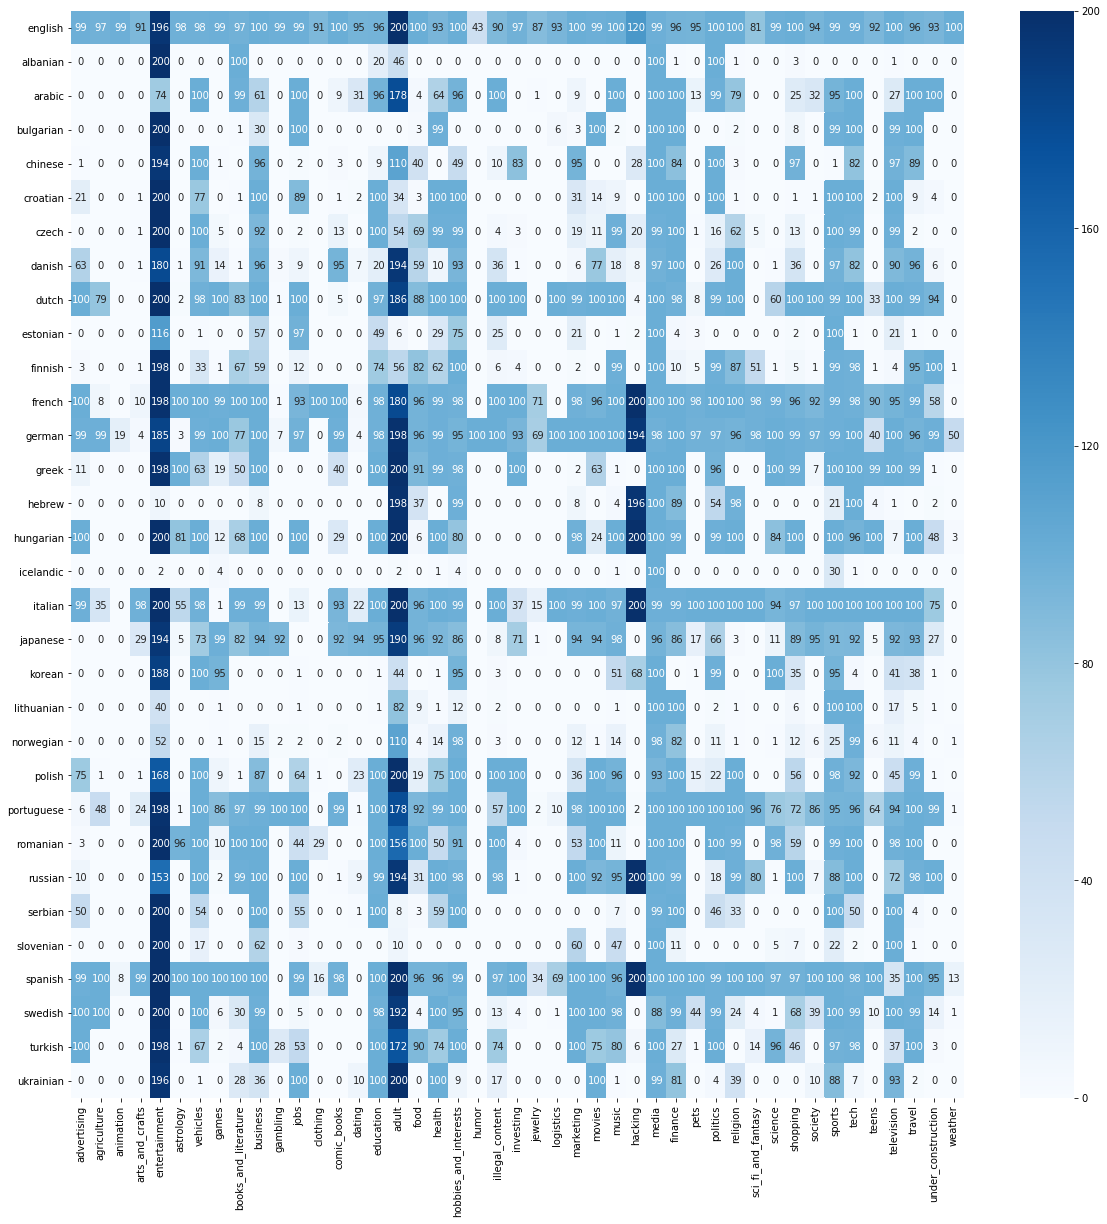

In [6]:
plt.figure(figsize=(20, 20))
sn.heatmap(stats, annot=True, cmap='Blues', fmt='g')
plt.show()

####  So now we have an inside look on how this dataset distribution is. It's obvious some category or language don't have much data so it's probably needed to discard it during use in any project.

In [7]:
dataset[2][30]

'By Oil Price – The rivalry between Saudi Arabia and Iran is becoming increasingly evident in the oil pricing policies of the two large Middle Eastern producers. The two countries are currently reigniting the market share…Vía Financial Sense https://ift.tt/2MLAiwt'

####  Rename Dataset Columns


In [8]:
dataset.columns = ["Language","Label","Text"]
dataset.head()


,Language,Label,Text
0,english,advertising,Exclusive: U.S. government seeks Facebook help...
1,english,advertising,Trump asks SEC to mull half-year corporate fil...
2,english,advertising,"Wall St. up on trade hopes, S&P equals longest..."
3,english,advertising,"Asian shares hit one-year low on Turkey, China..."
4,english,advertising,"Asian stocks weaken as Turkey worries weigh, d..."


####   Encode the labels of the dataset

In [9]:
label_encoder = LabelEncoder()
dataset["Label"] = label_encoder.fit_transform(dataset["Label"])

#### create a dataset for each language


In [10]:
languagesData=[]
loc = 0
for i in languages:
    name = languages[loc]+"Data" 
    globals()[name] = pd.DataFrame( dataset[dataset.Language == i])
    loc += 1
                        

#### Show sample from the datasets of french and spanish

In [11]:
print(frenchData.head())
print(spanishData.head())

      Language  Label                                               Text
20169   french      1  Home / GEEK / Le gouvernement américain interd...
20170   french      1  By OlivierLa puce la plus intéressante du lot ...
20171   french      1  Home / PEOPLE / Mélanie Da Cruz maman : Anthon...
20172   french      1  Arabie saoudite : plus de deux millions de fid...
20173   french      1  21 août 2018 à 10h16 | Par El Mehdi BerradaMoh...
      Language  Label                                               Text
55590  spanish      1  CIUDAD DE MÉXICO (apro).- Miguel Ángel Marín, ...
55591  spanish      1  Sigue la clausura de los Juegos Centroamerican...
55592  spanish      1  CIUDAD DE MÉXICO (apro).- Gerardo Axel “N”, ub...
55593  spanish      1  CIUDAD DE MÉXICO (apro).- En 2009, el movimien...
55594  spanish      1  CIUDAD DE MÉXICO (apro).- El Instituto de Veri...


In [12]:
len(englishData.Text)

4519

#### Prepare the English dataset to be trained

In [13]:
ESentences = englishData.Text
Ey = englishData.Label

#### Split the English dataset into train and test 

In [14]:
Esentences_train, Esentences_test, Ey_train, Ey_test = train_test_split(
   ESentences, Ey, test_size=0.25, random_state=1000)

#### Tokenize the text

In [15]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(Esentences_train)

EX_train = tokenizer.texts_to_sequences(Esentences_train)
EX_test = tokenizer.texts_to_sequences(Esentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index



#### Helping function for plotting the results

In [16]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

#### Pad the text with maxlen 100 and convert the labels to categorical

In [17]:
maxlen = 100

EX_train = pad_sequences(EX_train, padding='post', maxlen=maxlen)
EX_test = pad_sequences(EX_test, padding='post', maxlen=maxlen)

Ey_train = keras.utils.to_categorical(Ey_train)
Ey_test = keras.utils.to_categorical(Ey_test)

print(EX_train[0, :])


[   4   51  318 1388   12  596 1388 1445    5    4    1   44 1801 4255
  836    2  227  178    6    1  200  156    3 2844 1275  384    1 2772
   12   91 1244 1388  693    1   81  566    6  469    2   25  397  192
 1037 1244   11    1  743  593 2081 1960  902 1961   51  798  869  873
  351    4 1153 1678    6 1817   60  180   51   98 1244    1 1061   52
  924 3998   22 1041    1 1488  146  117 2422   17   71   63  381    3
  381    3 1116   11   17   49   13 3289 2265  681 2650   44  421 3999
    1 3933]


#### Input the text into the embedding layer, This model is a basic model 

In [18]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(45, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           3867850   
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               500100    
_________________________________________________________________
dense_2 (Dense)              (None, 45)                4545      
Total params: 4,372,495
Trainable params: 4,372,495
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(EX_train, Ey_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(EX_test, Ey_test))
loss, accuracy = model.evaluate(EX_train, Ey_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(EX_test, Ey_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Train on 3389 samples, validate on 1130 samples
Epoch 1/20
3389/3389 [==============================] - 19s 6ms/step - loss: 3.7002 - acc: 0.0947 - val_loss: 3.5546 - val_acc: 0.1044
Epoch 2/20
3389/3389 [==============================] - 16s 5ms/step - loss: 2.8258 - acc: 0.3626 - val_loss: 3.0747 - val_acc: 0.2124
Epoch 3/20
3389/3389 [==============================] - 16s 5ms/step - loss: 1.2847 - acc: 0.7893 - val_loss: 3.0728 - val_acc: 0.2372
Epoch 4/20
3389/3389 [==============================] - 17s 5ms/step - loss: 0.5564 - acc: 0.8495 - val_loss: 3.1006 - val_acc: 0.2389
Epoch 5/20
3389/3389 [==============================] - 17s 5ms/step - loss: 0.4377 - acc: 0.8652 - val_loss: 3.1472 - val_acc: 0.2389
Epoch 6/20
3389/3389 [==============================] - 17s 5ms/step - loss: 0.3563 - acc: 0.8740 - val_loss: 3.1234 - val_acc: 0.2487
Epoch 7/20
3389/3389 [==============================] - 17s 5ms/step - loss: 0.3273 - acc: 0.8770 - val_loss: 3.1725 - val_acc: 0.2407
Epoch 8

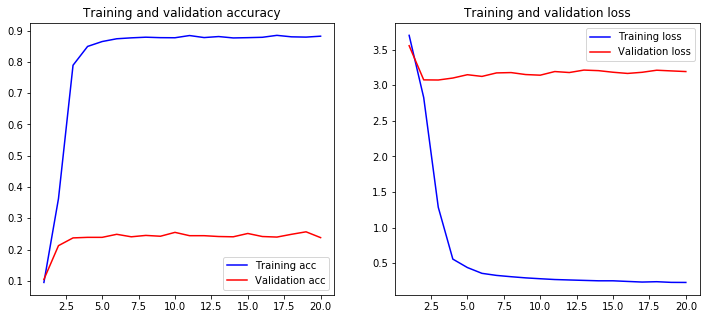

In [20]:
plot_history(history)

#### Using GloVe pretrained word embeddings

In [21]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [23]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    'glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

#### Using GRU and Pretrained Embeddings

In [24]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(GRU(256))
model.add(Dropout(0.2))
model.add(layers.Dense(45, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           3867850   
_________________________________________________________________
gru_1 (GRU)                  (None, 256)               235776    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 45)                11565     
Total params: 4,115,191
Trainable params: 4,115,191
Non-trainable params: 0
_________________________________________________________________


Train on 3389 samples, validate on 1130 samples
Epoch 1/10
3389/3389 [==============================] - 71s 21ms/step - loss: 3.7134 - acc: 0.0752 - val_loss: 3.5742 - val_acc: 0.1142
Epoch 2/10
3389/3389 [==============================] - 66s 19ms/step - loss: 3.3809 - acc: 0.1405 - val_loss: 3.2125 - val_acc: 0.1478
Epoch 3/10
3389/3389 [==============================] - 63s 19ms/step - loss: 2.9408 - acc: 0.2219 - val_loss: 2.9188 - val_acc: 0.2628
Epoch 4/10
3389/3389 [==============================] - 66s 19ms/step - loss: 2.6531 - acc: 0.2862 - val_loss: 2.7312 - val_acc: 0.2841
Epoch 5/10
3389/3389 [==============================] - 65s 19ms/step - loss: 2.2974 - acc: 0.3683 - val_loss: 2.6025 - val_acc: 0.3027
Epoch 6/10
3389/3389 [==============================] - 60s 18ms/step - loss: 2.0342 - acc: 0.4293 - val_loss: 2.5268 - val_acc: 0.3239
Epoch 7/10
3389/3389 [==============================] - 59s 17ms/step - loss: 1.7853 - acc: 0.4913 - val_loss: 2.4649 - val_acc: 0.3319


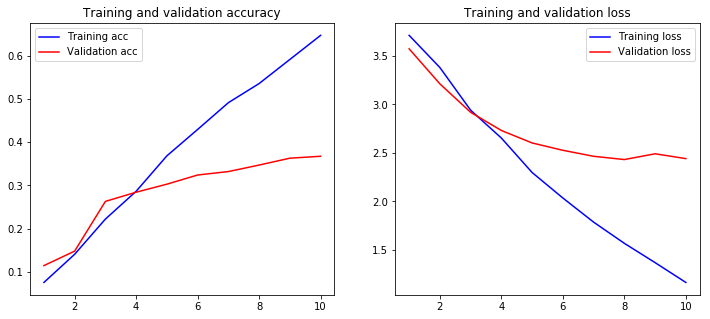

In [25]:
history = model.fit(EX_train, Ey_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(EX_test, Ey_test)
                   )
loss, accuracy = model.evaluate(EX_train, Ey_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(EX_test, Ey_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Increase the number of epochs doesnot matter

Train on 3389 samples, validate on 1130 samples
Epoch 1/50
3389/3389 [==============================] - 70s 21ms/step - loss: 1.0180 - acc: 0.6899 - val_loss: 2.4787 - val_acc: 0.3664
Epoch 2/50
3389/3389 [==============================] - 74s 22ms/step - loss: 0.8812 - acc: 0.7324 - val_loss: 2.5401 - val_acc: 0.3743
Epoch 3/50
3389/3389 [==============================] - 73s 21ms/step - loss: 0.7961 - acc: 0.7660 - val_loss: 2.5365 - val_acc: 0.3717
Epoch 4/50
3389/3389 [==============================] - 74s 22ms/step - loss: 0.7956 - acc: 0.7625 - val_loss: 2.5608 - val_acc: 0.3832
Epoch 5/50
3389/3389 [==============================] - 73s 21ms/step - loss: 0.6677 - acc: 0.7920 - val_loss: 2.5827 - val_acc: 0.3876
Epoch 6/50
3389/3389 [==============================] - 62s 18ms/step - loss: 0.5812 - acc: 0.8144 - val_loss: 2.6470 - val_acc: 0.3947
Epoch 7/50
3389/3389 [==============================] - 60s 18ms/step - loss: 0.5123 - acc: 0.8247 - val_loss: 2.6621 - val_acc: 0.4009


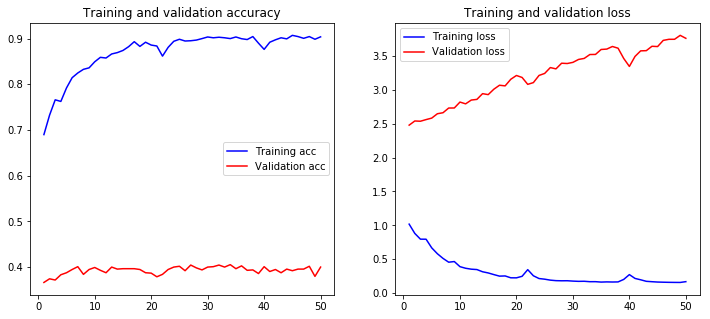

In [26]:
history = model.fit(EX_train, Ey_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(EX_test, Ey_test)
                   )
loss, accuracy = model.evaluate(EX_train, Ey_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(EX_test, Ey_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [27]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(GRU(256))
model.add(Dense(100, activation='tanh'))
model.add(Dropout(0.2))
model.add(layers.Dense(45, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           3867850   
_________________________________________________________________
gru_2 (GRU)                  (None, 256)               235776    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25700     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 45)                4545      
Total params: 4,133,871
Trainable params: 4,133,871
Non-trainable params: 0
_________________________________________________________________


Train on 3389 samples, validate on 1130 samples
Epoch 1/20
3389/3389 [==============================] - 63s 18ms/step - loss: 3.7045 - acc: 0.0800 - val_loss: 3.6010 - val_acc: 0.1124
Epoch 2/20
3389/3389 [==============================] - 58s 17ms/step - loss: 3.4823 - acc: 0.1248 - val_loss: 3.4015 - val_acc: 0.1531
Epoch 3/20
3389/3389 [==============================] - 62s 18ms/step - loss: 3.2056 - acc: 0.1708 - val_loss: 3.1584 - val_acc: 0.2035
Epoch 4/20
3389/3389 [==============================] - 63s 19ms/step - loss: 2.8649 - acc: 0.2322 - val_loss: 2.9223 - val_acc: 0.2487
Epoch 5/20
3389/3389 [==============================] - 59s 17ms/step - loss: 2.5530 - acc: 0.3048 - val_loss: 2.7231 - val_acc: 0.2920
Epoch 6/20
3389/3389 [==============================] - 59s 18ms/step - loss: 2.2318 - acc: 0.3786 - val_loss: 2.6006 - val_acc: 0.3345
Epoch 7/20
3389/3389 [==============================] - 60s 18ms/step - loss: 1.9279 - acc: 0.4565 - val_loss: 2.5000 - val_acc: 0.3381


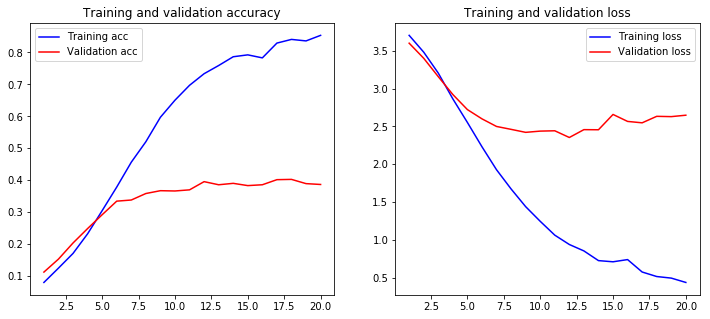

In [28]:
history = model.fit(EX_train, Ey_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(EX_test, Ey_test))
loss, accuracy = model.evaluate(EX_train, Ey_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(EX_test, Ey_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           3867850   
_________________________________________________________________
gru_3 (GRU)                  (None, 100, 256)          235776    
_________________________________________________________________
dense_6 (Dense)              (None, 100, 256)          65792     
_________________________________________________________________
gru_4 (GRU)                  (None, 256)               393984    
_________________________________________________________________
dense_7 (Dense)              (None, 45)                11565     
Total params: 4,574,967
Trainable params: 4,574,967
Non-trainable params: 0
_________________________________________________________________
Train on 3389 samples, validate on 1130 samples
Epoch 1/20
3389/3389 [==============================] - 76s 22ms/step - loss: 3.6485

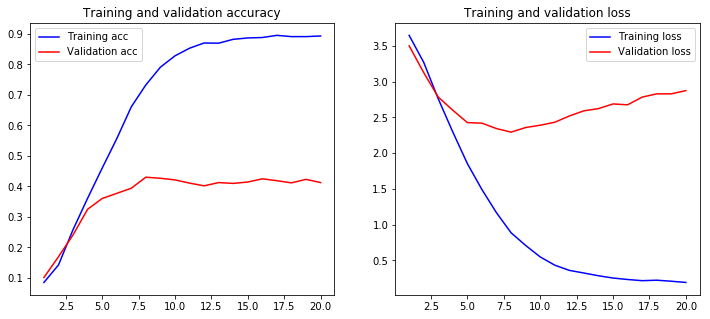

In [29]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(GRU(256, return_sequences=True))
# model.add(Dense(256, activation='tanh', kernel_regularizer=regularizers.l2(0.01),
#                 activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(256, activation='tanh'))
# let's encode this vector sequence into a single vector
model.add(GRU( 256, return_sequences=False))


# model.add(Dropout(0.2))
model.add(layers.Dense(45, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


history = model.fit(EX_train, Ey_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(EX_test, Ey_test))
loss, accuracy = model.evaluate(EX_train, Ey_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(EX_test, Ey_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)




#### Another Implementation for word embeddings

In [30]:
MAX_SEQUENCE_LENGTH = 100
embeddings_index = {}
with open("glove.6B.50d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

        
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 50
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


In [31]:
model = Sequential()
model.add(layers.Embedding(num_words, embedding_dim, 
                           embeddings_initializer=Constant(embedding_matrix), 
                           input_length=MAX_SEQUENCE_LENGTH, 
                           trainable=True))
model.add(GRU(256))
model.add(Dropout(0.2))
model.add(layers.Dense(45, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 50)           1000050   
_________________________________________________________________
gru_5 (GRU)                  (None, 256)               235776    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 45)                11565     
Total params: 1,247,391
Trainable params: 1,247,391
Non-trainable params: 0
_________________________________________________________________


Train on 3389 samples, validate on 1130 samples
Epoch 1/10
3389/3389 [==============================] - 26s 8ms/step - loss: 3.7076 - acc: 0.0794 - val_loss: 3.5656 - val_acc: 0.1018
Epoch 2/10
3389/3389 [==============================] - 26s 8ms/step - loss: 3.3866 - acc: 0.1325 - val_loss: 3.3588 - val_acc: 0.1381
Epoch 3/10
3389/3389 [==============================] - 26s 8ms/step - loss: 2.9755 - acc: 0.2136 - val_loss: 2.9009 - val_acc: 0.2478
Epoch 4/10
3389/3389 [==============================] - 27s 8ms/step - loss: 2.6206 - acc: 0.2904 - val_loss: 2.7230 - val_acc: 0.2708
Epoch 5/10
3389/3389 [==============================] - 23s 7ms/step - loss: 2.2597 - acc: 0.3680 - val_loss: 2.5463 - val_acc: 0.3142
Epoch 6/10
3389/3389 [==============================] - 21s 6ms/step - loss: 1.9387 - acc: 0.4456 - val_loss: 2.4317 - val_acc: 0.3566
Epoch 7/10
3389/3389 [==============================] - 25s 7ms/step - loss: 1.6739 - acc: 0.5128 - val_loss: 2.3567 - val_acc: 0.3726
Epoch 8

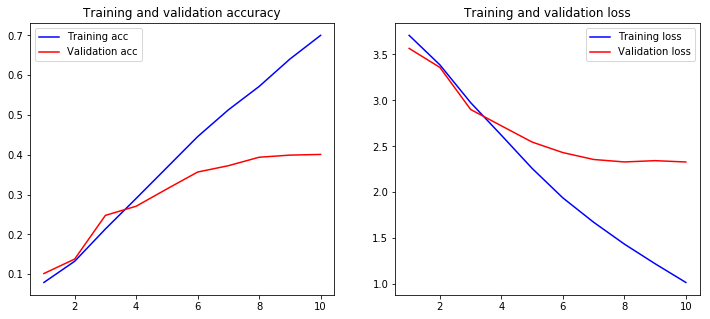

In [32]:
history = model.fit(EX_train, Ey_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(EX_test, Ey_test)
                   )
loss, accuracy = model.evaluate(EX_train, Ey_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(EX_test, Ey_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)